# What is Naive Bayes Classification?

Naive Bayes Classification traces its origins back to 1763 when the English philosopher and statistician, Thomas Bayes, introduced the Bayes Theorem. This theorem forms the bedrock of conditional probability, stating that the likelihood of an event's occurrence, given the presence of another event, is equivalent to the conditional probability of the second event given the first event, multiplied by the probability of the initial event itself.

Naive Bayes Classification is a prevalent method for categorization that draws heavily from Bayes' theorem. It involves determining the posterior class probability of a test data point by leveraging class-conditional density estimation and class prior probability. Subsequently, the test data point is allocated to the class with the highest computed posterior class probability.

# Bayes Formula
Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes’s theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
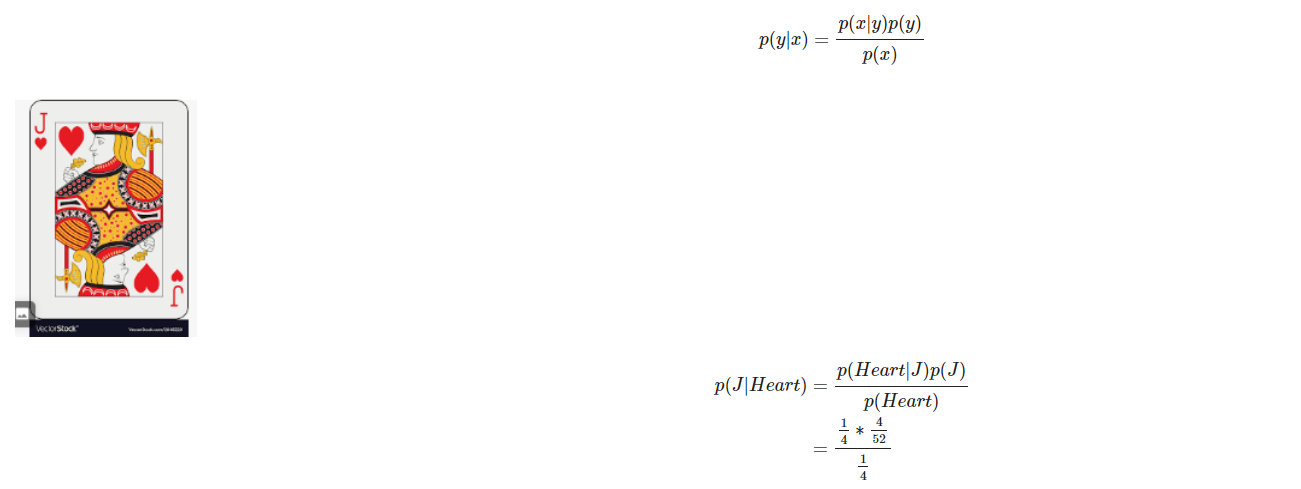


# Why is it called Naive Bayes?

The term "Naive Bayes" stems from the inherent assumption that this classification technique employs – the assumption of feature independence. To illustrate, take the Titanic Dataset as an example. When applying the naive Bayes method for classification, we adopt the notion that data attributes such as age, gender, class, and cabin are all entirely unrelated to one another.

It's crucial to recognize that this assumption is made for the sake of simplification, although in reality, these attributes might possess varying degrees of interdependence. This simplifying assumption aids in managing the intricacies of the model, even though real-world relationships within the data could be more intricate.


# Where is Naive Bayes Classification applicable?

Several intriguing projects could include:

- Spam Detection
- Character Recognition
- Weather Prediction
- News Article Categorization
- Face Detection

# What are the varieties of Naive Bayes Classification?

- Bernoulli: The Bernoulli model is applicable when our feature vectors possess binary characteristics, signifying they can adopt only two values (often 0 and 1). In the context of text classification using a 'bag of words' approach, the presence of a "1" signifies the "word occurs in the document," while a "0" signifies the "word does not occur in the document." This model proves valuable when representing the presence or absence of specific features in our data.

- Gaussian: Within classification, the Gaussian type operates under the assumption that the features we employ to depict data (such as measurements or attributes) adhere to a normal distribution. This implies that a majority of data points cluster around the average value, with fewer points deviating significantly from this mean.

- Multinomial: Multinomial comes into play when we confront discrete counts. For instance, in text classification, instead of merely discerning if a word is present in a document (as in Bernoulli), we now tally how frequently a word emerges in the document. It's akin to enumerating the occurrences of a specific outcome (word) observed across numerous trials (words in the document).






# Advantages and disadvantages of using Naive Bayes classification
## Advantages:
- Simplicity: Naive Bayes is a simple algorithm that is easy to understand and implement. It requires relatively little training data to estimate the parameters needed for classification.

- Fast training and prediction: Naive Bayes is computationally efficient, making it possible to train and predict on large datasets quickly.

- Robust to irrelevant features: Naive Bayes is robust to irrelevant features, meaning that it can still perform well even when some of the input features are not relevant to the classification task.

- Handles missing data: Naive Bayes can handle missing data by ignoring missing values during training and prediction.

##  Disadvantages:
- Independence assumption: Naive Bayes assumes that the input features are conditionally independent given the class label, which is often not true in real-world scenarios. This can lead to suboptimal performance if the features are highly correlated.

- Limited expressiveness: Naive Bayes is limited in its ability to capture complex relationships between input features and the class label. This can lead to suboptimal performance if the relationship is highly nonlinear or if there are complex interactions between the features.

- Sensitivity to outliers: Naive Bayes is sensitive to outliers, which can have a disproportionate impact on the model's results.

- Limited to categorical and discrete data: Naive Bayes is designed to work with categorical and discrete data, making it less suitable for continuous or numerical data.

***Overall, Naive Bayes is a simple and efficient algorithm that can work well in certain scenarios, particularly when the input features are conditionally independent given the class label. However, it is important to consider its limitations and assumptions before using it.***

# Project

In [1]:
# Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Reading the data from .csv file
df = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
# display the first 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Displaying the first 5 rows gives us an idea of how the data is arranged in the table. This helps us estimate which features are necessary and which are not. Note : The label ham denotes non spam emails.

# Data Processing

In [4]:
# Drop the columns with NaN values
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

We do not need the Not-a-Number (NaN) values, as they do not provide any insights into the data or impact other features. Therefore, we are dropping them.

In [5]:
# Rename columns for clarity:
df.columns = ['label', 'text']

In [6]:
# Explore the dataset
print("Dataset Overview:")
print(df.head())
print("\nLabel Distribution:")
print(df['label'].value_counts())

Dataset Overview:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label Distribution:
ham     4825
spam     747
Name: label, dtype: int64


## Separate Features and Target Labels

A standard dataset comprises input features and their corresponding target labels. Input features encompass the attributes or variables employed to formulate predictions, while target labels encompass the values that we seek to predict.

For instance, let's contemplate a straightforward example: envision instructing a computer to differentiate between an apple and an orange based on attributes like color and size. Here, the features consist of the fruit's color and size, while the labels pertain to whether the fruit is classified as an apple or an orange.

In [7]:
# Separate features (X) and target labels (y)
X =  df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Classifier (Multinomial Naive Bayes)


In this project, we are employing the MultinomialNB() classifier, which exclusively accommodates numeric inputs. Nevertheless, our X_train and X_test datasets contain text-based information (email messages). This is where CountVectorizer() becomes significant. Its purpose here is to convert the provided text into a vector representation, capturing the frequency (count) of each word across the entirety of the text. This conversion is indispensable for facilitating the classifier's efficient processing of the textual data.

In [8]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [9]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

In [10]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

## Make Predictions on the Test Data

In this step, we are predicting the accuracy of our model by evaluating how precisely it can predict outcomes on new, unseen data.

In [11]:
# make prediction on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ",accuracy)
print("Confusion matrix:")
print(conf_matrix)
print("Classification Report")
print(classification_rep)

Accuracy:  0.9838565022421525
Confusion matrix:
[[963   2]
 [ 16 134]]
Classification Report
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Visualizing the Data

Comprehending raw numbers or datasets can frequently pose a challenge. Hence, it holds paramount importance to visually portray our data. Through the creation of visual representations, intricate patterns, trends, and correlations are rendered more accessible to grasp compared to dealing solely with raw numerical values. Visualization also facilitates the detection of outliers within the dataset. In the provided code snippet, we have harnessed a histogram to visualize the data, showcasing the distribution of both spam and non-spam emails.

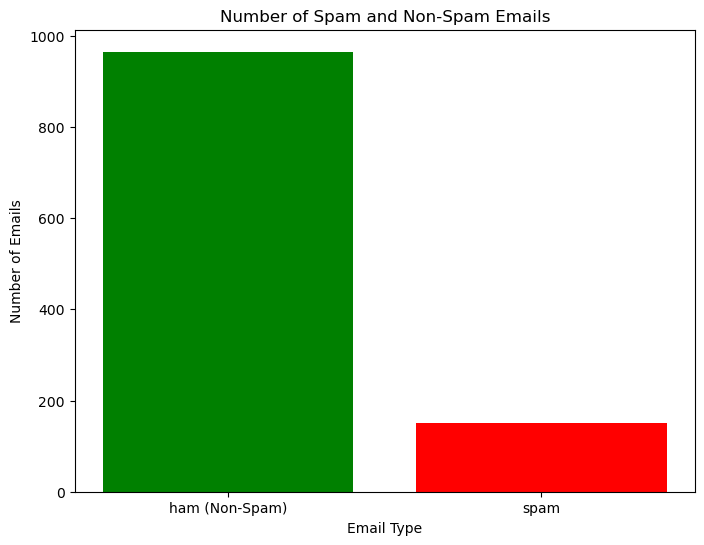

In [12]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()